In [1]:
%matplotlib inline


# Cross-validation on diabetes Dataset Exercise

A tutorial exercise which uses cross-validation with linear models.

This exercise is used in the `cv_estimators_tut` part of the
`model_selection_tut` section of the `stat_learn_tut_index`.


In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

print(datasets.load_diabetes(return_X_y=True))

'''
What is Lasso Regression?
Lasso regression is a type of linear regression that uses shrinkage.

Shrinkage is where data values are shrunk towards a central point, like the mean.
The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters)
'''

# clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
# clf.fit(X, y)
# scores = clf.cv_results_["mean_test_score"]
# scores_std = clf.cv_results_["std_test_score"]
# plt.figure().set_size_inches(8, 6)
# plt.semilogx(alphas, scores)

# # plot error lines showing +/- std. errors of the scores
# std_error = scores_std / np.sqrt(n_folds)

# plt.semilogx(alphas, scores + std_error, "b--")
# plt.semilogx(alphas, scores - std_error, "b--")

# # alpha=0.2 controls the translucency of the fill color
# plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

# plt.ylabel("CV score +/- std error")
# plt.xlabel("alpha")
# plt.axhline(np.max(scores), linestyle="--", color=".5")
# plt.xlim([alphas[0], alphas[-1]])

# # #############################################################################
# # Bonus: how much can you trust the selection of alpha?

# # To answer this question we use the LassoCV object that sets its alpha
# # parameter automatically from the data by internal cross-validation (i.e. it
# # performs cross-validation on the training data it receives).
# # We use external cross-validation to see how much the automatically obtained
# # alphas differ across different cross-validation folds.
# lasso_cv = LassoCV(alphas=alphas, random_state=0, max_iter=10000)
# k_fold = KFold(3)

# print("Answer to the bonus question:", "how much can you trust the selection of alpha?")
# print()
# print("Alpha parameters maximising the generalization score on different")
# print("subsets of the data:")
# for k, (train, test) in enumerate(k_fold.split(X, y)):
#     lasso_cv.fit(X[train], y[train])
#     print(
#         "[fold {0}] alpha: {1:.5f}, score: {2:.5f}".format(
#             k, lasso_cv.alpha_, lasso_cv.score(X[test], y[test])
#         )
#     )
# print()
# print("Answer: Not very much since we obtained different alphas for different")
# print("subsets of the data and moreover, the scores for these alphas differ")
# print("quite substantially.")

# plt.show()

(array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]]), array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  

In [4]:
X, y = datasets.load_diabetes(return_X_y=True)

X = X[:150]
y = y[:150]


In [5]:
lasso = Lasso(random_state=0, max_iter=100003)
alphas = np.logspace(-4, -0.5, 30)

tuned_parameters = [{"alpha": alphas}]
n_folds = 5

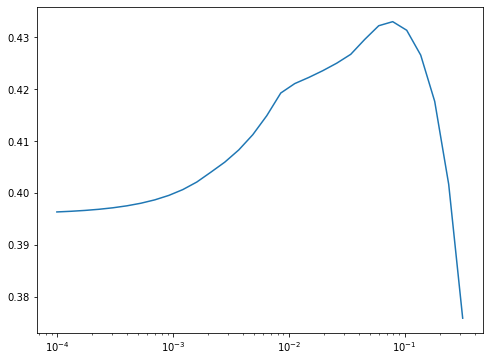

In [6]:
clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(X, y)
scores = clf.cv_results_["mean_test_score"]
scores_std = clf.cv_results_["std_test_score"]
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

(0.0001, 0.31622776601683794)

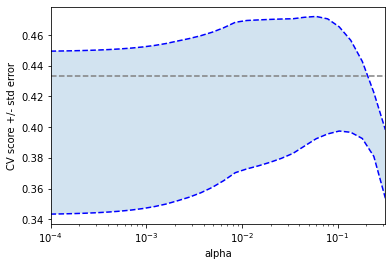

In [7]:
# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, "b--")
plt.semilogx(alphas, scores - std_error, "b--")

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel("CV score +/- std error")
plt.xlabel("alpha")
plt.axhline(np.max(scores), linestyle="--", color=".5")
plt.xlim([alphas[0], alphas[-1]])